In [558]:
## project on application of classification models
## predcition Task to determine whether person makes over 50K a year

import numpy as np
import pandas as pd
df=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',header=None)

In [559]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [560]:
df.shape

(32561, 15)

In [561]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

In [562]:
# renaming columns


df.rename(columns={ df.columns[0]: "age",df.columns[1]:'workclass',df.columns[2]:'fnlwgt' ,
                  df.columns[3]:'education',df.columns[4]:"education-num",df.columns[5]:'martial_status',df.columns[6]:'occupation',
                 df.columns[7]:'relationship',df.columns[8]:'race',df.columns[9]:'sex',df.columns[10]:'capital-gain',df.columns[11]:'capital-loss',
                 df.columns[12]:'hours-per-week',df.columns[13]:'native-country',df.columns[14]:'salary'},inplace=True)



In [563]:
df.head()

,age,workclass,fnlwgt,education,education-num,martial_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## data-analysis exploration

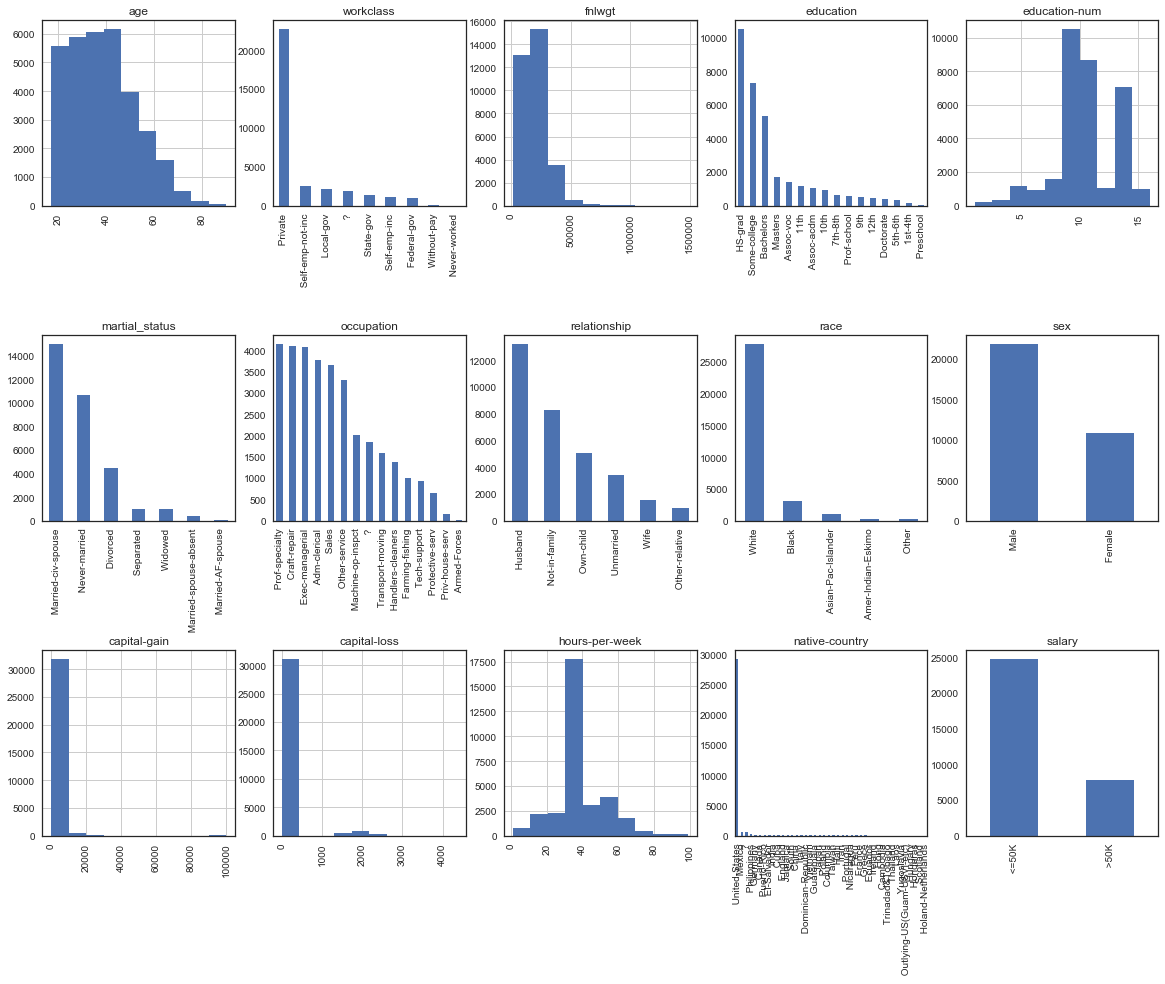

In [564]:
import pandas as pd
import numpy as np
import statsmodels as sm
import sklearn as skl
import sklearn.preprocessing as preprocessing
import sklearn.linear_model as linear_model
import sklearn.cross_validation as cross_validation
import sklearn.metrics as metrics
import sklearn.tree as tree
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import math

fig = plt.figure(figsize=(20,15))
cols = 5
rows = math.ceil(float(df.shape[1]) / cols)
for i, column in enumerate(df.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if df.dtypes[column] == np.object:
        df[column].value_counts().plot(kind="bar", axes=ax)
    else:
        df[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)


In [565]:
(df["native-country"].value_counts() / df.shape[0]).head()

 United-States    0.895857
 Mexico           0.019748
 ?                0.017905
 Philippines      0.006081
 Germany          0.004207
Name: native-country, dtype: float64

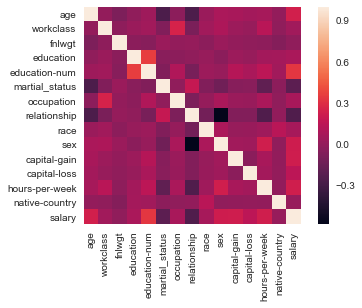

In [566]:
#let’s explore something else. The correlation between the different features. Generally it is not a good idea to have many correlated features, as it might be a sign that your data is not very good.
#For this purpose we will need to encode the categorical features as numbers.


# Encode the categorical features as numbers
def number_encode_features(data):
    result = data.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

# Calculate the correlation and plot it
ed, _ = number_encode_features(df)
sns.heatmap(ed.corr(), square=True)
plt.show()

In [567]:
df[["education", "education-num"]].head(15)

,education,education-num
0,Bachelors,13
1,Bachelors,13
2,HS-grad,9
3,11th,7
4,Bachelors,13
5,Masters,14
6,9th,5
7,HS-grad,9
8,Masters,14
9,Bachelors,13


In [568]:
#As you can see these two columns actually represent the same features, 
#but encoded as strings and as numbers. We don’t need the string representation, 
#so we can just delete this column. 
#Note that it is a much better option to delete the Education column as the Education-Num has the important property that the values are ordered:
#the higher the number, the higher the education that person has. 
#This is a vaulable information a machine learning algorithm can use.


del df["education"]

In [569]:
df[["sex", "relationship"]].head(15)

,sex,relationship
0,Male,Not-in-family
1,Male,Husband
2,Male,Not-in-family
3,Male,Husband
4,Female,Wife
5,Female,Wife
6,Female,Not-in-family
7,Male,Husband
8,Female,Not-in-family
9,Male,Husband


In [570]:
ed.head()

,age,workclass,fnlwgt,education,education-num,martial_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [571]:
del ed['education']

In [572]:
ed.head()

,age,workclass,fnlwgt,education-num,martial_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,7,77516,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,13,2,10,5,2,0,0,0,40,5,0


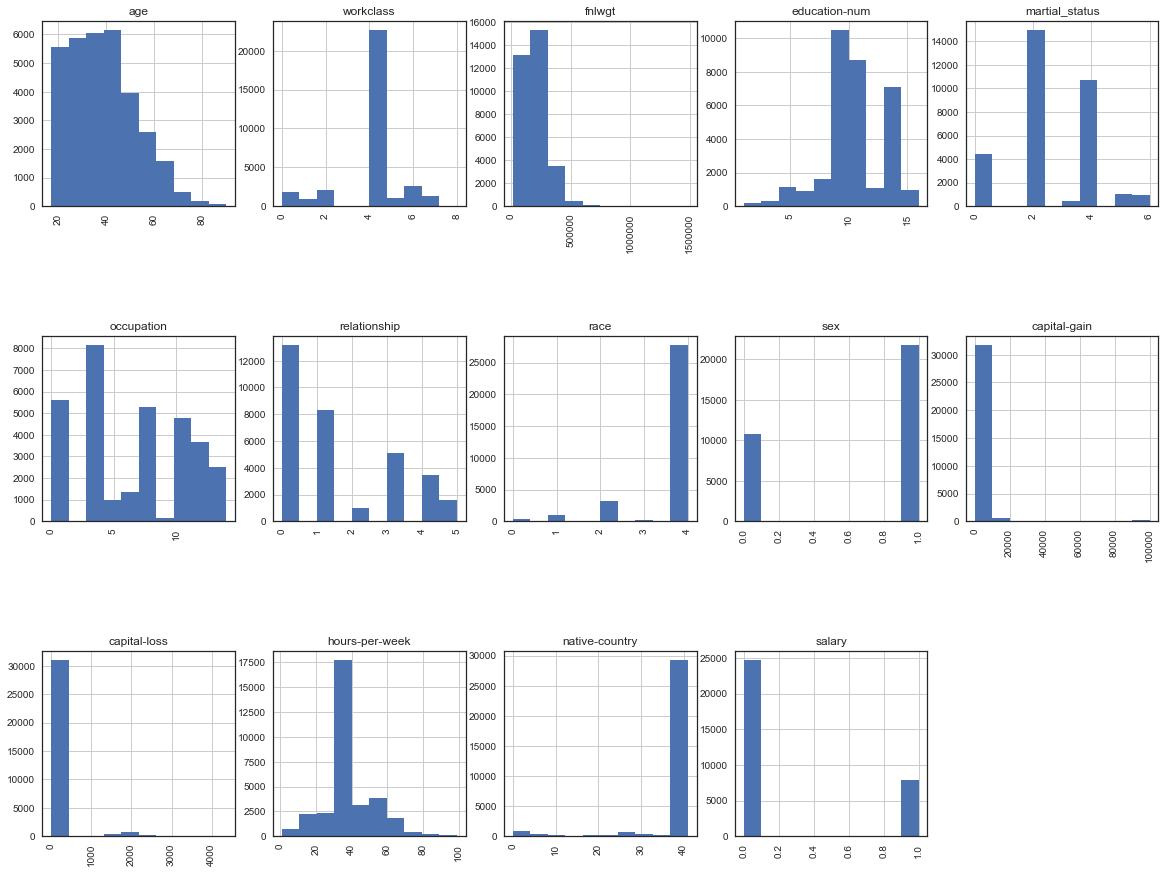

In [573]:
#First we need to encode the features as numbers as the classifiers cannot work with string features.
#As we saw a while ago this can be achieved easily with the function we defined earlier.
#Let’s encode the data and show the histograms of the values again.

ed, encoders = number_encode_features(df)
fig = plt.figure(figsize=(20,15))
cols = 5
rows = math.ceil(float(ed.shape[1]) / cols)
for i, column in enumerate(ed.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    ed[column].hist(axes=ax)
    plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

In [574]:
ed.head()

,age,workclass,fnlwgt,education-num,martial_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,7,77516,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,13,2,10,5,2,0,0,0,40,5,0


In [575]:
ed.groupby('salary').mean()

,age,workclass,fnlwgt,education-num,martial_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
salary,,,,,,,,,,,,,
0,36.783738,3.826578,190340.86517,9.595065,2.780906,6.393002,1.673422,3.631513,0.611974,148.752468,53.142921,38.840210,36.649070
1,44.249841,4.002296,188005.00000,11.611657,2.078816,7.139395,0.730519,3.774136,0.849637,4006.142456,195.001530,45.473026,36.938911


In [576]:
ed["native-country"].value_counts()

39    29170
26      643
0       583
30      198
11      137
2       121
33      114
8       106
19      100
5        95
9        90
23       81
35       80
3        75
22       73
6        70
40       67
13       64
24       62
31       60
4        59
36       51
14       44
20       43
32       37
27       34
29       31
12       29
10       29
7        28
21       24
17       20
1        19
38       19
37       18
25       18
41       16
28       14
18       13
16       13
34       12
15        1
Name: native-country, dtype: int64

In [577]:
ed.groupby('sex')['salary'].value_counts()

sex  salary
0    0          9592
     1          1179
1    0         15128
     1          6662
Name: salary, dtype: int64

In [578]:
df.groupby('martial_status')['salary'].value_counts()

martial_status          salary
 Divorced                <=50K     3980
                         >50K       463
 Married-AF-spouse       <=50K       13
                         >50K        10
 Married-civ-spouse      <=50K     8284
                         >50K      6692
 Married-spouse-absent   <=50K      384
                         >50K        34
 Never-married           <=50K    10192
                         >50K       491
 Separated               <=50K      959
                         >50K        66
 Widowed                 <=50K      908
                         >50K        85
Name: salary, dtype: int64

In [579]:
ed.groupby('martial_status')['salary'].value_counts()

martial_status  salary
0               0          3980
                1           463
1               0            13
                1            10
2               0          8284
                1          6692
3               0           384
                1            34
4               0         10192
                1           491
5               0           959
                1            66
6               0           908
                1            85
Name: salary, dtype: int64

In [580]:
ed['salary'].value_counts()

0    24720
1     7841
Name: salary, dtype: int64

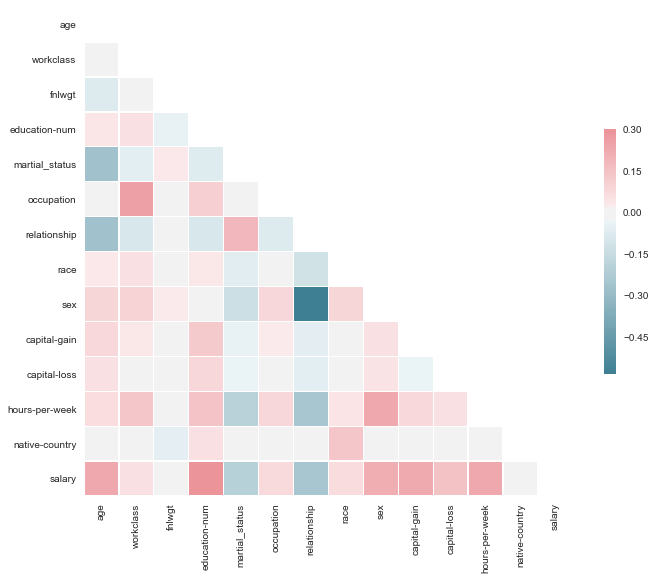

In [581]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = ed.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()


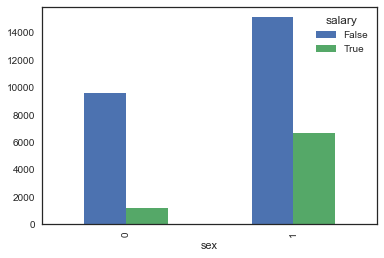

In [582]:
pd.crosstab(ed['sex'],ed['salary'].astype(bool)).plot(kind='bar')
plt.show()

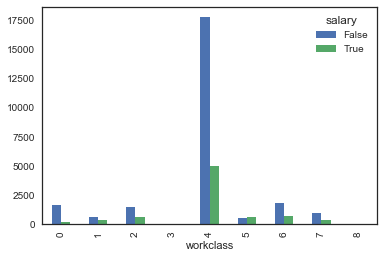

In [583]:
pd.crosstab(ed['workclass'],ed['salary'].astype(bool)).plot(kind='bar')
plt.show()

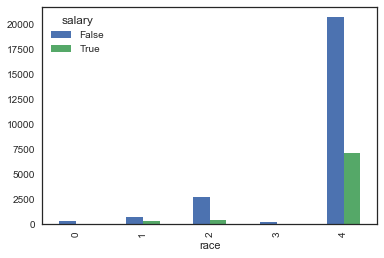

In [584]:
pd.crosstab(ed['race'],ed['salary'].astype(bool)).plot(kind='bar')
plt.show()

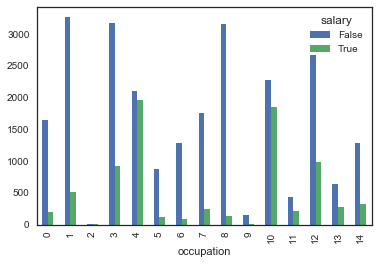

In [585]:
pd.crosstab(ed['occupation'],ed['salary'].astype(bool)).plot(kind='bar')
plt.show()

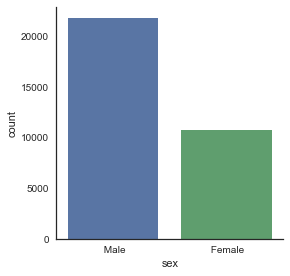

In [586]:
#Creating a factorplot, charting the number of male and female passengers
sns.factorplot('sex',data=df,kind='count')
plt.show()

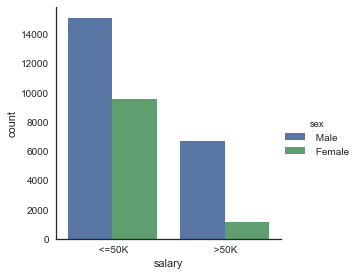

In [587]:
sns.factorplot('salary',data=df,hue='sex',kind='count')
plt.show()

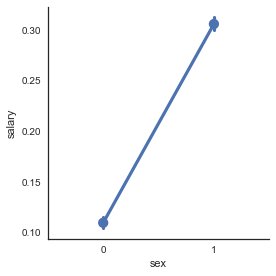

In [588]:
sns.factorplot('sex','salary',data=ed)

## Scale and then Split dataset for train and test 

In [589]:
ed_norm = ed.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [590]:
ed_norm.head()

,age,workclass,fnlwgt,education-num,martial_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,0.301370,0.875,0.044302,0.800000,0.666667,0.071429,0.2,1.0,1.0,0.02174,0.0,0.397959,0.951220,0.0
1,0.452055,0.750,0.048238,0.800000,0.333333,0.285714,0.0,1.0,1.0,0.00000,0.0,0.122449,0.951220,0.0
2,0.287671,0.500,0.138113,0.533333,0.000000,0.428571,0.2,1.0,1.0,0.00000,0.0,0.397959,0.951220,0.0
3,0.493151,0.500,0.151068,0.400000,0.333333,0.428571,0.0,0.5,1.0,0.00000,0.0,0.397959,0.951220,0.0
4,0.150685,0.500,0.221488,0.800000,0.333333,0.714286,1.0,0.5,0.0,0.00000,0.0,0.397959,0.121951,0.0


In [591]:
ed_norm.salary.value_counts()

0.0    24720
1.0     7841
Name: salary, dtype: int64

## applying different classification models and then ensembling

In [592]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X=ed_norm.drop(['salary'],axis=1)
y=ed_norm['salary']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.9)

In [593]:
## Model1:  Logistic Regression
## Model2: XG-Boost classifier
## Model3: Decision Tree
## Model4: Naive Bayes
## Model5: KNN
## Model6: Random Forest
## Model7: Ensembling

In [594]:
## LOGISITIC REGRESSION

from sklearn.linear_model import LogisticRegression
m1=LogisticRegression()

In [595]:
from sklearn.metrics import accuracy_score
m1.fit(X_train,y_train)
pred_LR=m1.predict(X_test)
print(accuracy_score(y_test,pred_LR))



0.816395455941


In [596]:
## XGB CLASSIFEIR
m2=XGBClassifier(n_estimator=50)
m2.fit(X_train,y_train)
pred_XGB=m2.predict(X_test)
print(accuracy_score(y_test,pred_XGB))
print(precision_score(y_test, pred_XGB))

0.858151673319
0.809294871795


In [597]:
## checking with AdaBOOSTClassifier
import pandas
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier
seed =7
num_trees= 30
kfold = model_selection.KFold(n_splits=10,random_state=seed)
model1= AdaBoostClassifier(n_estimators=num_trees,random_state=seed)
results = model_selection.cross_val_score(model1,X,y,cv=kfold)
print(results.mean())

0.855410044817


In [598]:
# Checking with Gradient Boost Classifier

import pandas
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier
seed =7
num_trees= 100
kfold = model_selection.KFold(n_splits=10,random_state=seed)
model2= GradientBoostingClassifier(n_estimators=num_trees,random_state=seed)
results = model_selection.cross_val_score(model2,X,y,cv=kfold)
print(results.mean())

0.865207068653


In [599]:
model3=XGBClassifier()
model3.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [600]:
y_pred=model3.predict(X_test)

In [601]:
predictions=[round(value) for value in y_pred]

In [602]:
from sklearn.metrics import accuracy_score

In [603]:
eval_set=[(X_test,y_test)]

In [604]:
model3.fit(X_train,y_train,early_stopping_rounds=5,eval_metric='auc',eval_set=eval_set,verbose=True)

[0]	validation_0-auc:0.843397
Will train until validation_0-auc hasn't improved in 5 rounds.
[1]	validation_0-auc:0.843397
[2]	validation_0-auc:0.843823
[3]	validation_0-auc:0.844281
[4]	validation_0-auc:0.85098
[5]	validation_0-auc:0.852502
[6]	validation_0-auc:0.852526
[7]	validation_0-auc:0.870704
[8]	validation_0-auc:0.875754
[9]	validation_0-auc:0.876894
[10]	validation_0-auc:0.877374
[11]	validation_0-auc:0.885441
[12]	validation_0-auc:0.888971
[13]	validation_0-auc:0.890799
[14]	validation_0-auc:0.890934
[15]	validation_0-auc:0.892863
[16]	validation_0-auc:0.893963
[17]	validation_0-auc:0.894299
[18]	validation_0-auc:0.895733
[19]	validation_0-auc:0.896919
[20]	validation_0-auc:0.897886
[21]	validation_0-auc:0.898096
[22]	validation_0-auc:0.899055
[23]	validation_0-auc:0.900698
[24]	validation_0-auc:0.901054
[25]	validation_0-auc:0.901395
[26]	validation_0-auc:0.902594
[27]	validation_0-auc:0.902589
[28]	validation_0-auc:0.903136
[29]	validation_0-auc:0.903709
[30]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [605]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.85815167331900521

In [606]:
print(model3.feature_importances_)

[ 0.15652174  0.02608696  0.04202899  0.13188405  0.06376812  0.07246377
  0.10144927  0.01014493  0.01884058  0.17101449  0.10724638  0.08550724
  0.01304348]


In [607]:
## Decision Tree

m3 =DecisionTreeClassifier(max_depth=3)
m3.fit(X_train,y_train)
        


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [608]:
pred_DT=m3.predict(X_test)

In [609]:
accuracy_score(y_test,pred_DT)

0.83236106846791524

In [610]:
## Gaussian Naive Bayes

m4=GaussianNB()

In [611]:
m4.fit(X_train,y_train)

GaussianNB(priors=None)

In [612]:
pred_NB=m4.predict(X_test)

In [613]:
accuracy_score(y_test,pred_NB)

0.78968375805956403

In [614]:
## KNN Classifier
m5=KNeighborsClassifier(n_neighbors=5)

In [615]:
m5.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [616]:
pred_KNN=m5.predict(X_test)

In [617]:
accuracy_score(y_test,pred_KNN)

0.81025483573840962

In [618]:
## Random Forest and bagging classifier

from sklearn.metrics import precision_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor
from sklearn.metrics import roc_auc_score

# we can achieve the above two tasks using the following codes
# Bagging: using all features
rfc1 = RandomForestClassifier(oob_score=True,random_state=1)
rfc1.fit(X_train, y_train)
pred_rf1 = rfc1.predict(X_test)
print(roc_auc_score(y_test, pred_rf1))
print(accuracy_score(y_test, pred_rf1))

# play around with the setting for max_features
rfc2 = RandomForestClassifier(criterion='entropy',random_state=1)
rfc2.fit(X_train, y_train)
pred_rf2 = rfc2.predict(X_test)
print(precision_score(y_test, pred_rf2))
print(roc_auc_score(y_test, pred_rf2))




D:\data_science\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\data_science\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


0.739479800591
0.830518882407
0.778301886792
0.762597952255


In [619]:
print(rfc1.feature_importances_)

[ 0.14735738  0.03972992  0.1720027   0.11266955  0.0866199   0.07024269
  0.08704929  0.01426827  0.01318826  0.11918522  0.04169654  0.07872534
  0.01726496]


In [620]:
print(rfc2.feature_importances_)

[ 0.15889089  0.03964512  0.17308055  0.10419641  0.08798544  0.06676462
  0.09796741  0.01542871  0.01350885  0.10355316  0.03806928  0.08317961
  0.01772996]


In [621]:
predictions = rfc1.predict_proba(X_test)[:,1]
predictions2 = rfc2.predict_proba(X_test)[:,1]
combined = (predictions + predictions2) / 2
rounded = np.round(combined)

print(roc_auc_score(y_test, rounded))
print(precision_score(y_test, rounded))
print(rounded.shape)


0.762149799886
0.772585669782
(3257,)


In [622]:
## random Forest with different paramters
rfc_1 = RandomForestClassifier(n_estimators=50,max_features=5, random_state=1,verbose=True,n_jobs=-1)
rfc_1.fit(X_train, y_train)

pred1 = rfc1.predict(X_test)
print(roc_auc_score(y_test, pred1))


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.3s


0.739479800591


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.7s finished


### Ensembling all classifiers and taking the best ensembled model

In [623]:
Ensemble_M = pd.DataFrame({'KNN':list(pred_KNN),'DT':list(pred_DT),'LogisticRegression':list(pred_LR),'XGB':list(pred_XGB),'RandomForest':list(rounded)})

In [624]:
Ensemble_M.shape

(3257, 5)

In [625]:

Ensemble_M.head()

,DT,KNN,LogisticRegression,RandomForest,XGB
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0


In [626]:
a=Ensemble_M.mode(axis=1)

In [627]:
Ensemble_M['Mode']=a[0]

In [628]:
from sklearn.metrics import accuracy_score

In [629]:
accuracy_score(y_test,Ensemble_M.Mode)

0.85446730119742098

In [630]:
Column_Name = list(range(X_train.shape[1]))

In [631]:
Column_Importance_Data = pd.DataFrame({'Column_Number':Column_Name,'Importance':m2.feature_importances_}) 
Column_Importance_Data['features']=X.columns


In [632]:
Column_Importance_Data.sort_values(['Importance'],ascending=False).head()

,Column_Number,Importance,features
9,9,0.171014,capital-gain
0,0,0.156522,age
3,3,0.131884,education-num
10,10,0.107246,capital-loss
6,6,0.101449,relationship


In [633]:
## Removing Random Forest and calculating Ensemble mode2 accuracy on test data

Ensemble_M2 = pd.DataFrame({'KNN':list(pred_KNN),'DT':list(pred_DT),'LogisticRegression':list(pred_LR),'XGB':list(pred_XGB),'NaiveBayes':list(pred_NB)})

In [634]:
a=Ensemble_M2.mode(axis=1)

In [635]:
Ensemble_M2['Mode']=a

In [636]:
accuracy_score(y_test,Ensemble_M2.Mode)

0.84157199877187594

In [637]:
Column_Importance_Data = pd.DataFrame({'Column_Number':Column_Name,'Importance':rfc_1.feature_importances_}) 
Column_Importance_Data['features']=X.columns

In [638]:
Column_Importance_Data.sort_values(['Importance'],ascending=False).head()

,Column_Number,Importance,features
2,2,0.176488,fnlwgt
0,0,0.140738,age
9,9,0.122761,capital-gain
3,3,0.120946,education-num
6,6,0.118614,relationship


In [639]:
## creating one more random Forest classifier

md5 = RandomForestClassifier(n_estimators=70,oob_score=True,random_state=45)

In [640]:
md5.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=70, n_jobs=1, oob_score=True, random_state=45,
            verbose=0, warm_start=False)

In [641]:
pred_RF2=md5.predict(X_test)

In [642]:
accuracy_score(y_test,pred_RF2)

0.8501688670555726

In [643]:
print(roc_auc_score(y_test, pred1))
print(precision_score(y_test, pred_RF2))

0.739479800591
0.763157894737


In [644]:
pred_RF2.sum()

684.0

In [645]:
Ensemble_M3 = pd.DataFrame({'KNN':list(pred_KNN),'DT':list(pred_DT),'LogisticRegression':list(pred_LR),'XGB':list(pred_XGB),'NaiveBayes':list(pred_NB),'RandomForest':list(pred_RF2)})

In [646]:
a=Ensemble_M3.mode(axis=1)

In [647]:
del a[1]

In [648]:
Ensemble_M3['Mode']=a

In [649]:
accuracy_score(y_test,Ensemble_M3.Mode)

0.83972981271108382

In [650]:
Column_Importance_Data = pd.DataFrame({'Column_Number':Column_Name,'Importance':md5.feature_importances_}) 
Column_Importance_Data['features']=X.columns

In [651]:
Column_Importance_Data.sort_values(['Importance'],ascending=False).head()

,Column_Number,Importance,features
2,2,0.171775,fnlwgt
0,0,0.147244,age
3,3,0.120595,education-num
9,9,0.117103,capital-gain
6,6,0.116052,relationship


In [652]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [653]:
print('Logistic Regression Accuracy : {:.2f}'.format(accuracy_score(y_test,pred_LR)))
print('Decision Tree Accuracy : {:.2f}'.format(accuracy_score(y_test,pred_DT)))
print('Random Forest : {:.2f} Accuracy'.format(accuracy_score(y_test,pred_RF2)))
print('Ensemble Mode 3 Accuracy_score : {:.2f}'.format(accuracy_score(y_test,Ensemble_M3.Mode)))
print('Ensemble Mode 2 Accuracy_score : {:.2f}'.format(accuracy_score(y_test,Ensemble_M2.Mode)))
print('Ensemble Mode 1 Accuracy_score : {:.2f}'.format(accuracy_score(y_test,Ensemble_M.Mode)))

print('')
print('Logistic Regression Recall_score : {:.2f}'.format(recall_score(y_test,pred_LR)))
print('Decision Tree Recall_score : {:.2f}'.format(recall_score(y_test,pred_DT)))
print('Ensemble Mode 3 Recall_score : {:.2f}'.format(recall_score(y_test,Ensemble_M3.Mode)))
print("")
print('Logistic Regression Precision_score : {:.2f}'.format(precision_score(y_test,pred_LR)))
print('Decision tree Precision_score : {:.2f}'.format(precision_score(y_test,pred_DT)))
print('Ensemble Mode 3 Precision_score : {:.2f}'.format(precision_score(y_test,Ensemble_M3.Mode)))
print('Ensemble Mode 2 Precision_score : {:.2f}'.format(precision_score(y_test,Ensemble_M2.Mode)))
print('Ensemble Mode 1 Precision_score : {:.2f}'.format(precision_score(y_test,Ensemble_M.Mode)))
print('Random Forest  Precision_score : {:.2f}'.format(precision_score(y_test,pred_RF2)))
print("")
print(f1_score(y_test,pred_LR))
print(f1_score(y_test,pred_DT))
print(f1_score(y_test,Ensemble_M3.Mode))
print('')
print(accuracy_score(y_test,pred_KNN))
print(recall_score(y_test,pred_KNN))
print(precision_score(y_test,pred_KNN))


Logistic Regression Accuracy : 0.82
Decision Tree Accuracy : 0.83
Random Forest : 0.85 Accuracy
Ensemble Mode 3 Accuracy_score : 0.84
Ensemble Mode 2 Accuracy_score : 0.84
Ensemble Mode 1 Accuracy_score : 0.85

Logistic Regression Recall_score : 0.45
Decision Tree Recall_score : 0.49
Ensemble Mode 3 Recall_score : 0.48

Logistic Regression Precision_score : 0.74
Decision tree Precision_score : 0.79
Ensemble Mode 3 Precision_score : 0.84
Ensemble Mode 2 Precision_score : 0.81
Ensemble Mode 1 Precision_score : 0.83
Random Forest  Precision_score : 0.76

0.560294117647
0.603197674419
0.608108108108

0.810254835738
0.544811320755
0.665706051873


### Seeing accuracy and precisison score Ensemble Mode 1 and Ensemble Mode 3 are equally good

### Random forest classifier is better than all and equally good with XGBoost when comapring accuracy and precision score



In [654]:
Column_Importance_Data = pd.DataFrame({'Column_Number':Column_Name,'Importance':m3.feature_importances_}) 
Column_Importance_Data['features']=X.columns

In [655]:
## Column Feature Imporatnce
Column_Importance_Data.sort_values(['Importance'],ascending=False).head()

,Column_Number,Importance,features
6,6,0.529776,relationship
9,9,0.271535,capital-gain
3,3,0.197152,education-num
0,0,0.001537,age
1,1,0.000000,workclass


In [656]:
# For each X, calculate VIF and save in dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [657]:
vif.round(1)

,VIF Factor,features
0,3.7,age
1,8.4,workclass
2,3.7,fnlwgt
3,12.8,education-num
4,4.0,martial_status
5,3.7,occupation
6,2.6,relationship
7,17.1,race
8,4.4,sex
9,1.0,capital-gain


In [658]:
probability = pd.DataFrame(md5.predict_proba(X)[:,1])


In [659]:
probability.head()

,0
0,0.000000
1,0.214286
2,0.000000
3,0.028571
4,0.200000


In [660]:
probability2 = pd.DataFrame(rfc_1.predict_proba(X)[:,1])

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.4s finished


In [661]:
probability2.head()

,0
0,0.00
1,0.24
2,0.00
3,0.00
4,0.26


In [662]:
probability.head()

,0
0,0.000000
1,0.214286
2,0.000000
3,0.028571
4,0.200000


### Age , Capital- gain, Education- num, Relationship are the most significant features

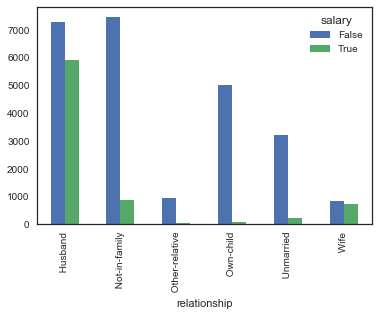

In [663]:
## exploring data for the best features

pd.crosstab(df['relationship'],ed['salary'].astype(bool)).plot(kind='bar')
plt.show()

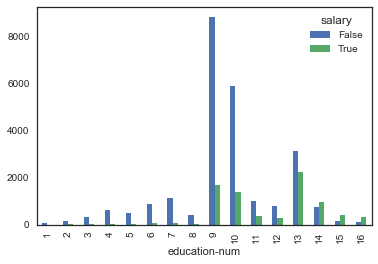

In [671]:
pd.crosstab(df['education-num'],ed['salary'].astype(bool)).plot(kind='bar')
plt.show()

In [665]:
ed.head()

,age,workclass,fnlwgt,education-num,martial_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,7,77516,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,13,2,10,5,2,0,0,0,40,5,0


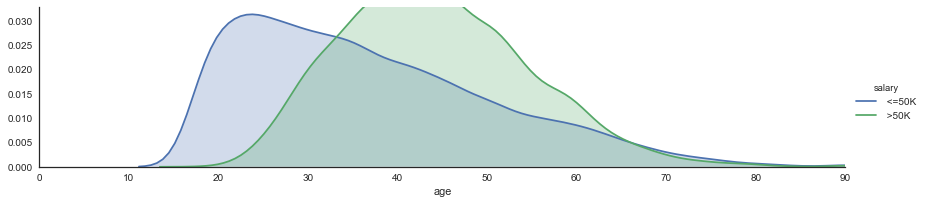

In [666]:
fig = sns.FacetGrid(df,hue='salary',aspect=4)

fig.map(sns.kdeplot,'age',shade=True)

oldest = df['age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

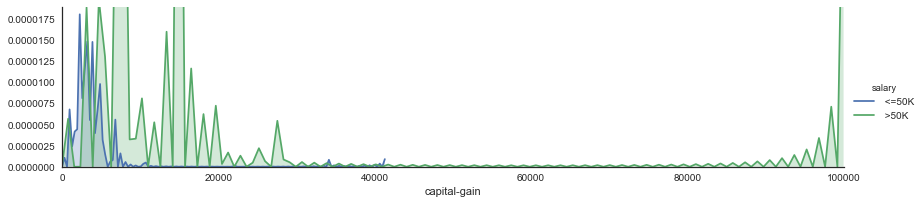

In [667]:
fig = sns.FacetGrid(df,hue='salary',aspect=4)

fig.map(sns.kdeplot,'capital-gain',shade=True)

oldest = df['capital-gain'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

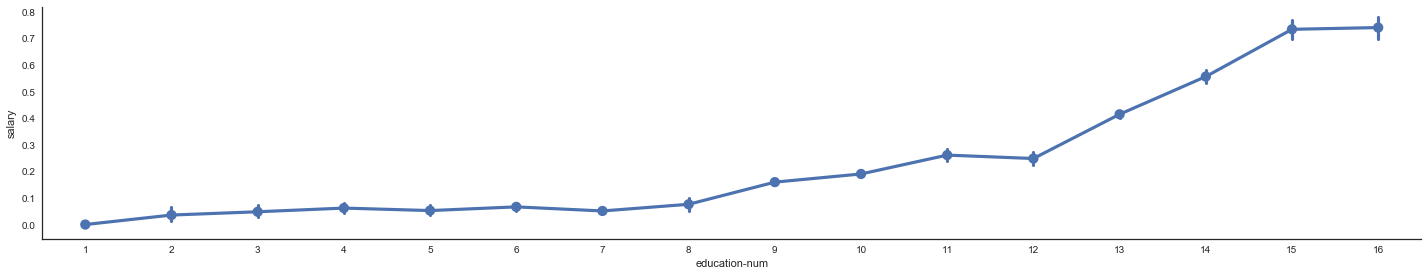

In [668]:
sns.factorplot('education-num','salary',data=ed,aspect=5)

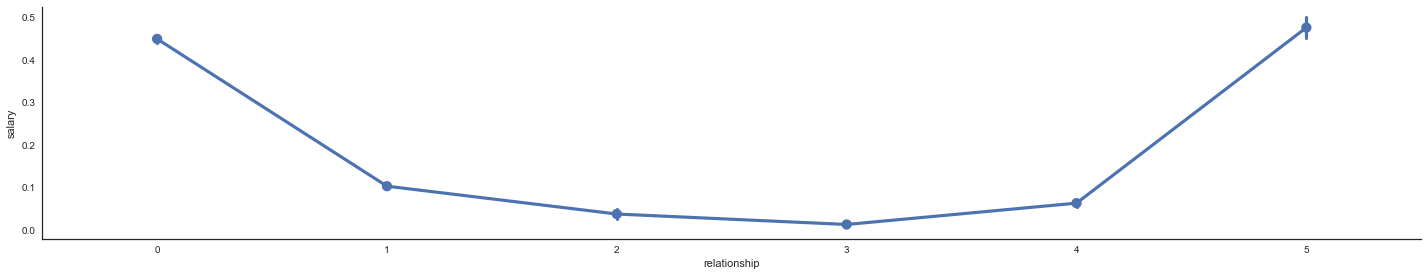

In [669]:
sns.factorplot('relationship','salary',data=ed,aspect=5)